In [50]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,data
from skimage.color import rgb2gray
from matplotlib.pyplot import imshow as op
from matplotlib.pyplot import figure as fig

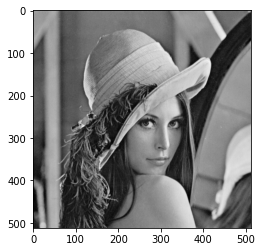

In [44]:
img = io.imread('http://live.ece.utexas.edu/research/Quality/zhou_research_anch/quality_index/Image6.gif')
fig()
op(img, cmap = 'gray')

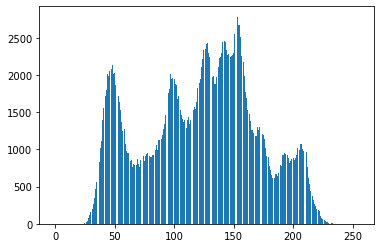

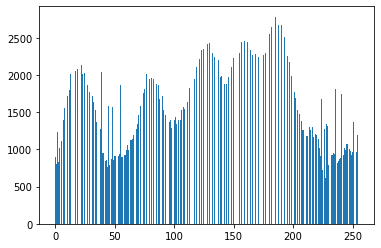

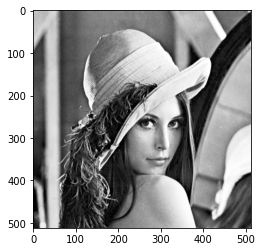

In [27]:
# histogram equalization
def histogram_equalization(img):
    m, n = img.shape
    hist = np.zeros(256)
    for i in range(m):
        for j in range(n):
            hist[img[i, j]] += 1
    fig()
    plt.bar(range(256), hist)
    for i in range(256):
        hist[i] = hist[i] / (m * n)
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]
    cdf = cdf * 255
    cdf = cdf.astype(np.uint8)
    
    img_equalization = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            img_equalization[i, j] = cdf[img[i, j]]
    img_equalization = img_equalization.astype(np.uint8)
    hist2 = np.zeros(256)
    for i in range(m):
        for j in range(n):
            hist2[img_equalization[i, j]%255] += 1
    fig()
    plt.bar(range(256), hist2)
    
    return img_equalization

imgeq = histogram_equalization(img)
fig()
op(imgeq, cmap = 'gray')

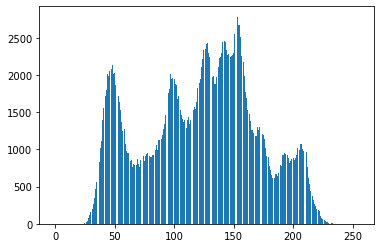

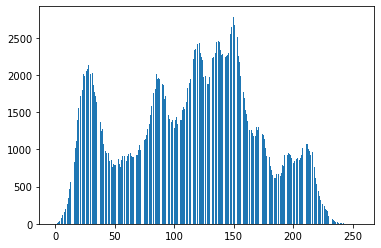

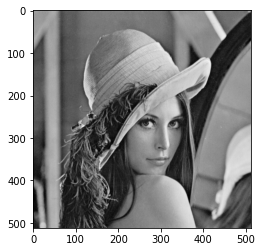

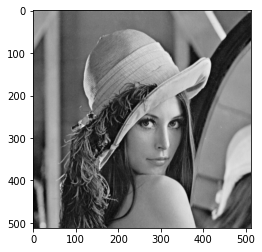

In [29]:
# histogram streching
def histogram_streching(img):
    m, n = img.shape
    hist = np.zeros(256)
    for i in range(m):
        for j in range(n):
            hist[img[i, j]] += 1
    fig()
    plt.bar(range(256), hist)
    min = 255
    max = 0
    for i in range(256):
        if hist[i] != 0:
            if i < min:
                min = i
            if i > max:
                max = i
    img_streching = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            img_streching[i, j] = (img[i, j] - min) * 255 / (max - min)
    img_streching = img_streching.astype(np.uint8)
    hist2 = np.zeros(256)
    for i in range(m):
        for j in range(n):
            hist2[img_streching[i, j]] += 1
    fig()
    plt.bar(range(256), hist2)

    return img_streching
img_streched = histogram_streching(img)
fig()
op(img, cmap = 'gray')
fig()
op(img_streched, cmap = 'gray')


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

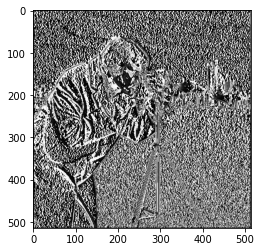

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

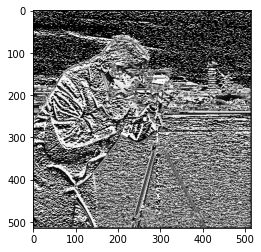

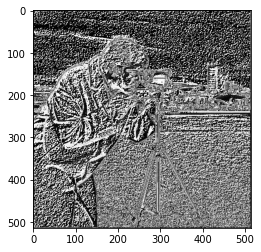

In [56]:
# masking 3*3
def masking(_img, kernel):
    # wraping the image
    m, n = _img.shape
    img= np.zeros((m + 2, n + 2))
    img[1:m + 1, 1:n + 1] = _img
    m,n = img.shape
    fig()
    # op(img, cmap = 'gray')
    img2 = img.copy()
    for i in range(m - 2):
        for j in range(n - 2):
            img2[i + 1, j + 1] = np.sum(img[i:i + 3, j:j + 3] * kernel)
    img2 = img2.astype(np.uint8)
    fig()
    # op(img2, cmap = 'gray')
    return img2
# masks
avg = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
gaussian = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
prewittx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitty = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

img2 = masking((data.camera()), prewittx)
fig()
op(img2, cmap = 'gray')
img3 = masking((data.camera()), prewitty)
fig()
op(img3, cmap = 'gray')
img4 = img3 + img2
fig()
op(img4, cmap = 'gray')


In [57]:
# masking 2*2
def masking2(_img, kernel):
    # wraping the image
    m, n = _img.shape
    img= np.zeros((m + 1, n + 1))
    img[1:m + 1, 1:n + 1] = _img
    m,n = img.shape
    fig()
    # op(img, cmap = 'gray')
    img2 = img.copy()
    for i in range(1,m - 1):
        for j in range(1,n - 1):
            img2[i , j] = np.sum(img[i:i + 1, j:j + 1] * kernel)
    img2 = img2.astype(np.uint8)
    fig()
    # op(img2, cmap = 'gray')
    return img2

# masks
robertsx = np.array([[0, 1], [-1, 0]])
robertsy = np.array([[1, 0], [0, -1]])

masking2((data.camera()), robertsx)


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0, 190],
       [  0,   0,   0, ...,   0,   0, 190],
       ...,
       [  0,   0,   0, ...,   0,   0, 147],
       [  0,   0,   0, ...,   0,   0, 168],
       [  0,  25,  25, ..., 151, 152, 149]], dtype=uint8)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 161, 161, ..., 140, 127,   0],
       [  0, 161, 161, ..., 140, 127,   0],
       ...,
       [  0,  42,  47, ..., 105, 180,   0],
       [  0,  42,  47, ..., 105, 106,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

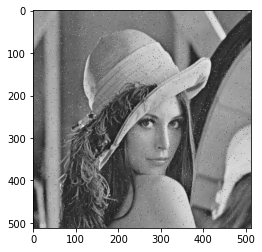

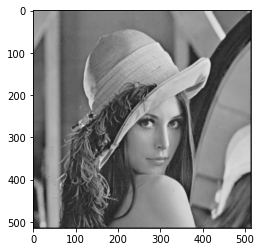

In [62]:
# order statistics filter
def order_statistics_filter(img):
    m, n = img.shape
    img2 = np.zeros((m+2,n+2))
    img2[1:m + 1, 1:n + 1] = img
    m,n = img2.shape
    for i in range(m-2):
        for j in range(n-2):
            img2[i + 1, j +1] = np.median(img[i:i + 2, j:j + 2])
    img2 = img2.astype(np.uint8)
    fig()
    op(img, cmap = 'gray')
    fig()
    op(img2, cmap = 'gray')
    return img2
order_statistics_filter((io.imread('lena salt.png')))